# Using Natural Language Processing to Analyze Yelp Reviews

Yelp provides a crowd-sourced review forum for businesses and services. People share their reviews and rate businesses and services. Other users can also rate other people's reviews.

The goal of this project is to build a machine learning model that can predict whether customers are satisfied or not based on the reviews they have written.

My personal learning objective from this project is to explore the basics of Natural Language Processing (NLP), apply feature extraction using Count Vectorizers and understand the theory behind Naive Bayes classifiers.



## EDA

In [184]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [185]:
# Importing data
df = pd.read_csv("yelp.csv")

In [186]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   business_id  10000 non-null  object
 1   date         10000 non-null  object
 2   review_id    10000 non-null  object
 3   stars        10000 non-null  int64 
 4   text         10000 non-null  object
 5   type         10000 non-null  object
 6   user_id      10000 non-null  object
 7   cool         10000 non-null  int64 
 8   useful       10000 non-null  int64 
 9   funny        10000 non-null  int64 
dtypes: int64(4), object(6)
memory usage: 781.4+ KB


In [188]:
df.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


**Observations**
- The dataset contains 10000 reviews and 10 features.
- On average the stars given in this dataset is 3.78 and standard deviation around 1.21.

In [189]:
# Looking at some of the reviews
df["text"][0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [190]:
df["text"][53]

"We got passes for the preview of Mission Impossible (Ghost Protocol).  We enjoyed the movie a lot.  The theater itself is fine.  The chairs don't move, and you can't raise the arm rests.  No rocking, no reclining (granted most theater seats don't move a lot, but these don't move at all).  Otherwise the seats were reasonably comfortable.  The screen is IMAX (i.e. huge), and the sound was reasonably good.  \n\nThey could have put a little more slope into the auditorium seating.  In other IMAX theaters I've been in it seemed the heads of people in front of you NEVER block any portion of the screen.  But I found a few were just slightly into the bottom of the screen.  It wasn't bad, but given my other IMAX experiences I did notice it."

**Thoughts**
- It would be intresting to know how long each review is. How much detail, time and effort do people put into their reviews.

In [191]:
# Looking at what length of text in each review

df["length"] = df["text"].apply(len)

In [192]:
df.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


<Axes: ylabel='Frequency'>

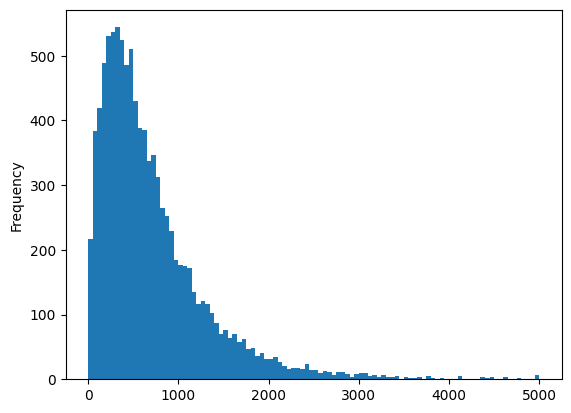

In [193]:
df["length"].plot(bins = 100, kind = "hist")

In [194]:
df["length"].describe()

count    10000.000000
mean       710.738700
std        617.399827
min          1.000000
25%        294.000000
50%        541.500000
75%        930.000000
max       4997.000000
Name: length, dtype: float64

**Observations**
- Looking at the histogram reviews contain around 400 to 800 words. The histogram begins to tail of from about 900 words.
- The mean words per review is around 710.74 and a std of around 619.4. So this suggests there is high variability in the length of reviews. 
- The minimum is 1 and the maximum is 4997.

In [195]:
# Some of the longest reviews.
df[df["length"]>4900]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
55,FCcFT610nQBVcRdY-devQA,2012-01-14,6jRs2P6zTYMn36fVnCu1Zw,4,"In our continuing quest to identify cool, loca...",review,40aklZ2SQPKnlTPZdvAqww,0,1,0,4997
1870,PsKAMRgeydy54ytW8xWKCw,2010-01-11,oQ3ZMhZD9C4VF6DKX3gkpg,4,"Okay, it almost seems a shame to burst the bub...",review,6G8vLJUi1Ees2qC3RGA3Nw,2,1,1,4968
2622,eTbtfgUtfewdncgVf2CbWw,2012-09-16,UIUfEDc62fpMxWCW3Lc5PQ,5,Owned and operated by Eugenia Theodosopoulos (...,review,5lq4LkrviYgQ4LJNsBYHcA,2,3,3,4986
3686,He9Dar4bk2vyeiPC7TkUgA,2011-05-21,x0x4lsz_9BT-Hjr7TrzMKA,2,I went to Eddie's House last night with the BF...,review,3gIfcQq5KxAegwCPXc83cQ,2,2,1,4972
4033,iJPG0GPcIirjOMlmzZWxBQ,2009-03-14,o22kERld_m3G7OkuglvtJg,3,I hate having to give out three star reviews. ...,review,o1HQEND6cg-4SK0Z1ASBMQ,7,6,9,4975
5504,nts2OALwvyvfNh9focRZ3w,2010-01-26,WcdQAdv76EryJpLI_-eO4g,4,"Reasons to Heart: Breakfast All Day, Self-Serv...",review,mfvezpz6ohS0NQk3DZdvqQ,6,10,10,4951
6237,jNS0oWMju3PyOHkMDcv02A,2007-08-07,OtoumFd8NnqVoAdBh1p80A,2,"""Fuck you all, we hope you die.\nThat's the Tr...",review,akmkd_2iLRrbOyPBfYLN0A,4,3,4,4926
6611,corPOxxIBRJ7DSpryYvorw,2008-12-04,qSEMTr86RSjlOsedZhXb_g,5,"Wow. Wow Freakin' Wow.\n\nI have never, ever h...",review,IXaxy5NZ_ku8rkXt04lxVQ,2,2,4,4960


In [196]:
# Some of the shortest reviews.
df[df["length"]<10]

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
1290,QSCeI8HdUluG-YmbDWo-fw,2012-02-17,SjWAYNV79iT-j6NSUS1Rcw,2,No good,review,VRzQrrqpEonzull95pDCww,0,0,1,7
2733,WYj43z0qmlKklhcvV75mwQ,2013-01-02,5kmDKV6A3CZjLYvpYY7L6Q,5,Good food,review,_QrW0F17JNDfgao-bpz9Ng,0,0,0,9
2931,rRXGdtqUTBtczey1DGenEQ,2012-08-20,0zfkrAdu1SE3ZbTO3_bN_A,5,Super!,review,clWfsHVPgeSEusg-W6ybVg,0,0,0,6
4091,saiTvSpVRktGqgt1f4dQIw,2012-11-02,8u2AsQlHNgNqNICRjbSqkg,5,Intense!,review,bIZiqk9KkgrnVizFB5feLA,0,0,0,8
5105,TpQMR-JFE5V0UPzTjjuwFQ,2012-10-28,OzLuYcpWmm-5cq8RrCqReQ,5,Excellent,review,3p_muaP7a652QYtHUZNsFQ,0,0,0,9
6450,tbRu-3NR5za1SEZkszcp5Q,2012-01-03,IVoMGfn9QrZ4dATwc9HBcg,3,X,review,SHcX9hp5RG3-OqsbvissIQ,0,0,0,1
6708,KGX7O-_WqOIy9o7u9NOa9A,2011-04-19,EdFx6mNJDfJWP6yDO42cUQ,4,Go,review,vnSz2VT6s-gdRBjlFDACYg,0,0,0,2
7881,jj-K19oswZARMwCQK-b37A,2012-07-25,eAoV5Vuhh1GvDK8FbqNyHQ,3,Meh.,review,iq46mlqoLmNQzTR1z8oqUA,0,1,0,4
9688,cp39VURFby4A6u9m2It8jg,2012-08-09,Pa0j9chxMZpOhRb2A0R7DQ,5,Yummy!,review,I6KftQl6q4I7IuKV7wPR7w,0,1,0,6


In [197]:
# The longest review
df.iloc[55]["text"]

'In our continuing quest to identify cool, locally owned places to eat and/or drink, Caroline and I auditioned Vintage 95 last night. \n\nBefore I go further, understand that whenever I go out for eats or drinks, I have  in  mind a Platonic Ideal of the Bar/Pub/Eatery I most want to frequent. I\'m on a constant quest to find that  Ideal expressed in Real Life. \n\nVintage 95 isn\'t quite there, but it\'s damn close. If I ever give something Five Stars, you\'ll know it has pegged my Platonic Ideal. Anyway...\n\nThe plan last night was for drinks. No plans for food, just Adult Beverages and warm conversation. But it turned into more.\n\nThe location in downtown Chandler is terrific for us. The owners have created a very fine visual experience - leather, stone, dark woods, good lighting. And they don\'t have the music turned up so loud that you CANNOT HAVE A CONVERSATION. This is one of my pet peeves. If I want to stare at people move their mouths while enduring an aural assault, I\'ll st

**Count plot of number of reviews**

Text(0.5, 1.0, 'Number of stars')

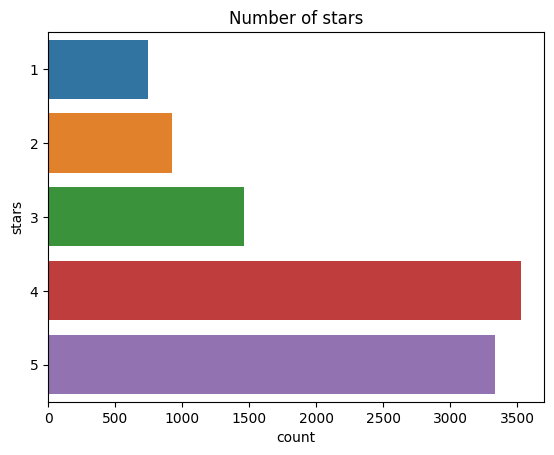

In [198]:
sns.countplot(data = df, y = "stars").set_title("Number of stars")

**Histogram of stars as a function of length**

The aim here is to see, what is the distribution of length (the amount of words people write in their reviews) for each star. So we can get an idea as to how much people write when giving good or bad reviews.

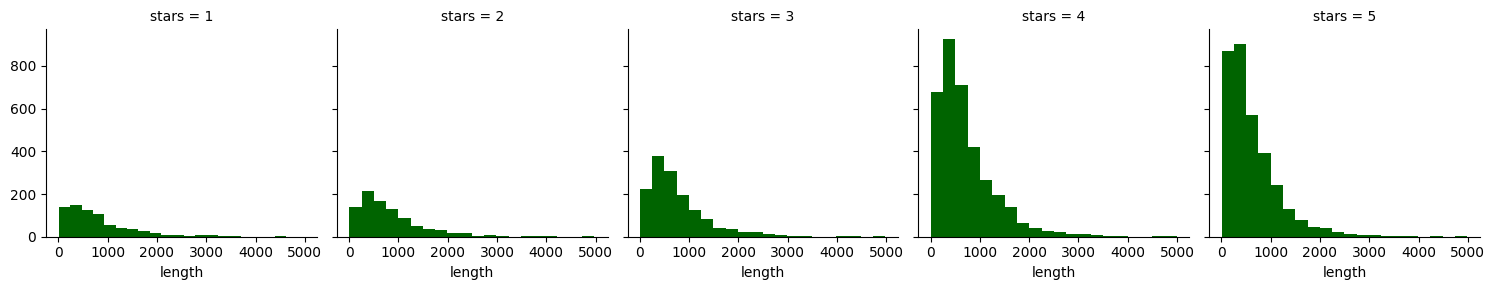

In [199]:
g = sns.FacetGrid(data = df, col= "stars", col_wrap = 5)
g.map(plt.hist, "length", bins = 20, color = "darkgreen")

**Observations**
- As we expect from looking at the countplot, frequency from 4 and 5 star reviews is much higher. 
- However in general, all histograms seem to follow the same shape.
- We have an unbalanced dataset.

In [239]:
# comparing the extream reviews. Comparing 1 star reviews to 5 star reviews
df1 = df[df["stars"]==1]
df5 = df[df["stars"]==5]

In [240]:
# combine
df_2 = pd.concat([df1, df5])

In [241]:
df_2.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,length
23,IJ0o6b8bJFAbG6MjGfBebQ,2010-09-05,Dx9sfFU6Zn0GYOckijom-g,1,U can go there n check the car out. If u wanna...,review,zRlQEDYd_HKp0VS3hnAffA,0,1,1,594
31,vvA3fbps4F9nGlAEYKk_sA,2012-05-04,S9OVpXat8k5YwWCn6FAgXg,1,Disgusting! Had a Groupon so my daughter and ...,review,8AMn6644NmBf96xGO3w6OA,0,1,0,361
35,o1GIYYZJjM6nM03fQs_uEQ,2011-11-30,ApKbwpYJdnhhgP4NbjQw2Q,1,"I've eaten here many times, but none as bad as...",review,iwUN95LIaEr75TZE_JC6bg,0,4,3,1198
61,l4vBbCL9QbGiwLuLKwD_bA,2011-11-22,DJVxOfj2Rw9zklC9tU3i1w,1,I have always been a fan of Burlington's deals...,review,EPROVap0M19Y6_4uf3eCmQ,0,0,0,569
64,CEswyP-9SsXRNLR9fFGKKw,2012-05-19,GXj4PNAi095-q9ynPYH3kg,1,Another night meeting friends here. I have to...,review,MjLAe48XNfYlTeFYca5gMw,0,1,2,498


## Cleaning Text

**Objective**
- Remove punctuation
- Remove words such as "I", "so" "you" and other words that we don't need

In [203]:
# We want to remove punctuation from the reviews.
import string

In [204]:
len(df_2)

4086

In [205]:
v1 = []
for i in range(0, len(df)):
  v1.append("".join([char for char in df["text"][i] if char not in string.punctuation]))

In [206]:
# Remove certain words like stop words
import nltk.corpus
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [207]:
v2 = []
for i in range(0, len(df_2)):
  v2.append(([word for word in v1[i].split() if word.lower() not in stopwords.words("english")]))

In [248]:
# We just want to predict between 1 ratings and 5 ratings.

# create a clean function.

def clean_text(text):
  x = [char for char in text if char not in string.punctuation]
  x = "".join(x)
  x = [word for word in x.split() if word.lower() not in stopwords.words("english")]

  return x

In [249]:
df_2_clean = df_2["text"].apply(clean_text)

In [259]:
print(df_2_clean.iloc[23])

['recently', 'shit', 'cleaned', 'Intercontinental', 'Hotel', 'Hong', 'Kong', 'cheap', 'mention', 'place', 'charged', 'clean', 'suit', 'almost', '30', 'twopiece', 'suit', 'tacked', '6', 'designer', 'brand', 'surcharge', 'kidding', 'Despite', 'branding', 'green', 'suit', 'still', 'reeked', 'solvent', 'green', 'silicabased', 'solvents', 'never', 'left', 'odor', 'experience', 'differentiation', 'justify', 'absurd', 'prices', 'lot', 'good', 'alternatives', 'area', 'warned']


In [258]:
df_2.iloc[23]["text"]

'I recently had a shit cleaned at the Intercontinental Hotel in Hong Kong. Not cheap. I only mention that because this place charged MORE to clean that suit - almost $30 for a two-piece suit after they tacked on their $6 "designer brand" surcharge (no, I am not kidding). Despite branding as "green" the suit still reeked of solvent (the green, silica-based solvents have never left an odor in my experience). No differentiation to justify these absurd prices - a lot of good alternatives in the area. Be warned!'

## Count Vectorizer

In [252]:
from numpy.lib.function_base import vectorize
from sklearn.feature_extraction.text import CountVectorizer

In [267]:
vectorizer = CountVectorizer(analyzer=clean_text)
X = vectorizer.fit_transform(df_2["text"])

## Train Model

- Just a practice section

In [254]:
from sklearn.naive_bayes import MultinomialNB

In [255]:
NB_classi = MultinomialNB()
label = df_2["stars"].values

In [274]:
NB_classi.fit(X, label)

MultinomialNB()

In [275]:
X.shape

(4086, 26435)

In [309]:
# Testing

test1 = ["amazing food! i loved it"]
test2 = ["I hated it, it made me sick"]

test_vecto = vectorizer.transform(test1)
test_pred = NB_classi.predict(test_vecto)

In [310]:
test_pred

array([5])

In [311]:
test_vecto = vectorizer.transform(test2)
test_pred = NB_classi.predict(test_vecto)

In [312]:
test_pred

array([1])

We see that the model classfies the test reviews well, however they where quite simple tests. In the next section I do it properly by splitting the data into training and testing.

## Splittin Data to Training and Testing

In [315]:
from sklearn.model_selection import train_test_split

y = label

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [316]:
# Train model now
NB_classi = MultinomialNB()
NB_classi.fit(X_train, y_train)

MultinomialNB()

## Evaluating the Model

In [322]:
from sklearn.metrics import classification_report, confusion_matrix

In [323]:
y_pred_train = NB_classi.predict(X_train)

Text(0.5, 1.0, 'Confusion Matrix for Predicted Train Data')

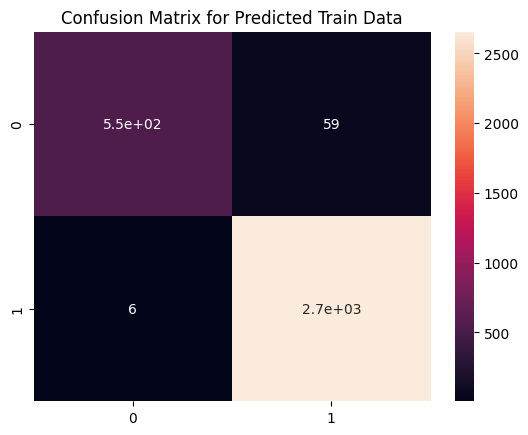

In [326]:
cm = confusion_matrix(y_train, y_pred_train)
sns.heatmap(cm, annot = True).set_title("Confusion Matrix for Predicted Train Data")

**Observations**
- The top-left value (547) represents the number of true negatives (TN), indicating the instances that were correctly predicted as negative.
- The top-right value (59) represents the number of false positives (FP), indicating the instances that were incorrectly predicted as positive when they were actually negative.
- The bottom-left value (6) represents the number of false negatives (FN), indicating the instances that were incorrectly predicted as negative when they were actually positive.
- The bottom-right value (2656) represents the number of true positives (TP), indicating the instances that were correctly predicted as positive.


In this case, we can observe that the model has a high number of true negatives (547) and true positives (2656), suggesting it is performing well in correctly classifying both negative and positive instances. However, there are a small number of false positives (59) and false negatives (6), indicating some misclassifications.

Text(0.5, 1.0, 'Confusion Matrix for Predicted Train Data')

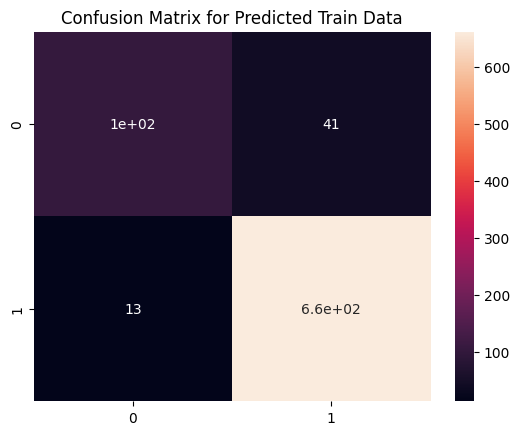

In [328]:
# No for the testing data
y_pred_test = NB_classi.predict(X_test)
cm = confusion_matrix(y_test, y_pred_test)
sns.heatmap(cm, annot = True).set_title("Confusion Matrix for Predicted Train Data")

In [331]:
cm

array([[102,  41],
       [ 13, 662]])

In [330]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       0.89      0.71      0.79       143
           5       0.94      0.98      0.96       675

    accuracy                           0.93       818
   macro avg       0.91      0.85      0.88       818
weighted avg       0.93      0.93      0.93       818



**Observations**

For class 1:

- The precision is 0.89, indicating that out of all instances predicted as class 1, 89% were actually true positives.
- The recall is 0.71, suggesting that 71% of the actual class 1 instances were correctly identified by the model.
- The F1-score is 0.79, which is the harmonic mean of precision and recall, providing an overall measure of the model's performance for class 1.
- The support is 143, indicating the number of instances in the testing data that belong to class 1.

For class 5:

- The precision is 0.94, indicating that out of all instances predicted as class 5, 94% were actually true positives.
- The recall is 0.98, suggesting that 98% of the actual class 5 instances were correctly identified by the model.
- The F1-score is 0.96, which provides an overall measure of the model's performance for class 5.
- The support is 675, indicating the number of instances in the testing data that belong to class 5.
- The accuracy of the model on the testing data is reported as 0.93, indicating that the model correctly predicted the class labels for 93% of the instances in the testing set.


The macro average F1-score is 0.88, which is the average of the F1-scores for each class, giving equal weight to both classes.

The weighted average F1-score is also 0.93, which takes into account the class imbalance by considering the support of each class.

Overall, the model demonstrates strong performance, with high precision, recall, and F1-scores for both classes.






